### This notebook contains code to extract 30 seconds raw audio using spotify api. 

In [1]:
#importing module spotipy to make api calls to spotify
import spotipy

# extracting tracks top tracks of artist with id :2NmK5FyrQ18HOPXq1UBzqa
lz_uri = 'spotify:artist:2NmK5FyrQ18HOPXq1UBzqa' 

spotify = spotipy.Spotify()
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print 'track    : ' + track['name']
    print 'audio    : ' + track['preview_url']
    print 'cover art: ' + track['album']['images'][0]['url']
    print

track    : Weak
audio    : https://p.scdn.co/mp3-preview/fefc542eab30c632ba5bbf6624dd051d377b4b39?cid=null
cover art: https://i.scdn.co/image/8a216dab9d7e5321ff67b850f396d3322f2cbe64

track    : Right Here - Human Nature Radio Mix
audio    : https://p.scdn.co/mp3-preview/2e10fc709c55a4c5e136c075da1c27f6aae1c9ae?cid=null
cover art: https://i.scdn.co/image/8a216dab9d7e5321ff67b850f396d3322f2cbe64

track    : I'm So Into You
audio    : https://p.scdn.co/mp3-preview/9ff6224f466e12e5fcae4ef4cfc7dbcba2fbb301?cid=null
cover art: https://i.scdn.co/image/8a216dab9d7e5321ff67b850f396d3322f2cbe64

track    : Rain
audio    : https://p.scdn.co/mp3-preview/a92ed53abf4f9777a23979bba8e17468309b8bf6?cid=null
cover art: https://i.scdn.co/image/6c85c8ec3a89225668be06df4252eb2a6cd44095

track    : Use Your Heart
audio    : https://p.scdn.co/mp3-preview/e40ac9effa41b9f05021e883ead922c7f2b52e9e?cid=null
cover art: https://i.scdn.co/image/c1e67f7c0c8b5a32c0056c2a6cd62b18c78538e4

track    : Can We
audio    :

To save raw_audio, we need to go to the url and save the audio in mp3 format. The audio needs to be converted to wav format to be processed. 

In [2]:
# Convert file from mp3 to wav format 
# specify the name of the file in place of spotify_raw/rain.mp3
import pydub
sound = pydub.AudioSegment.from_mp3("spotify_raw/rain.mp3")
sound.export("spotify_raw/rain.wav", format="wav")


<open file 'spotify_raw/rain.wav', mode 'wb+' at 0x104ab1930>

### Priting raw- audio waveform

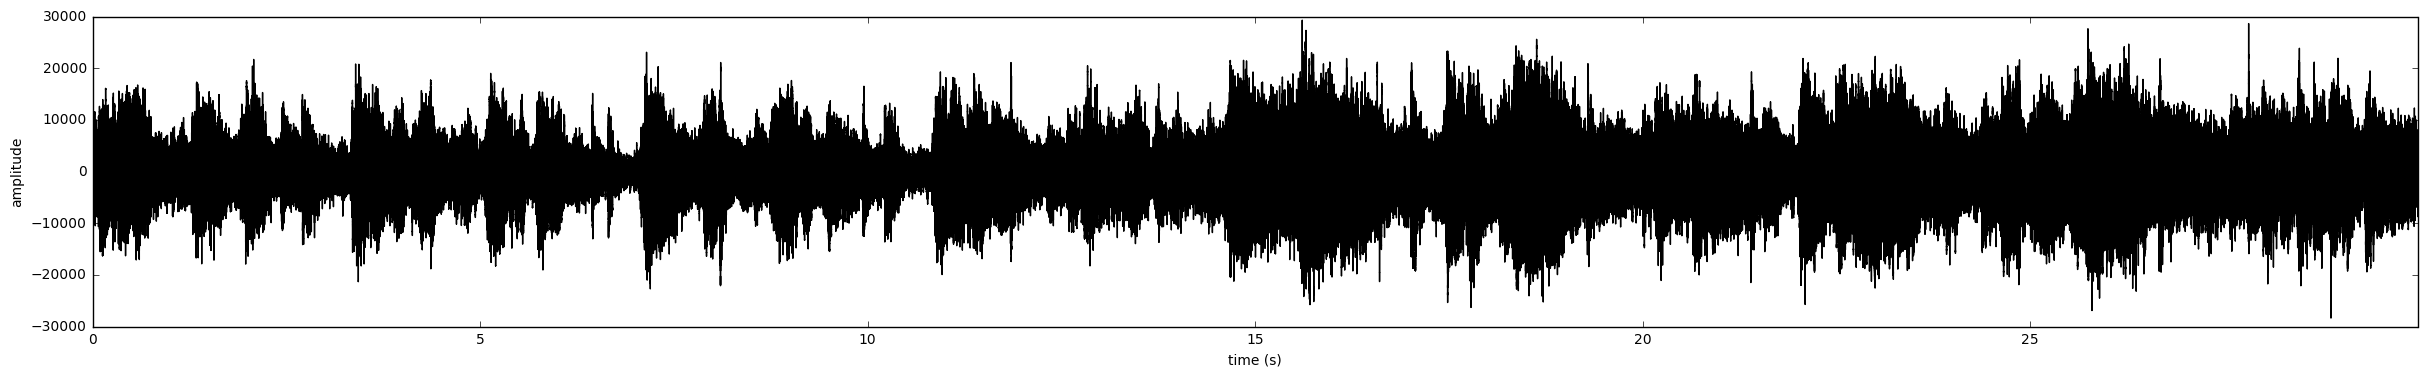

In [3]:
# code to print the audio waveform
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('spotify_raw/artist1---breathe.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
#plt.savefig('plot-artist1-breathe.png', dpi=100)
plt.show()

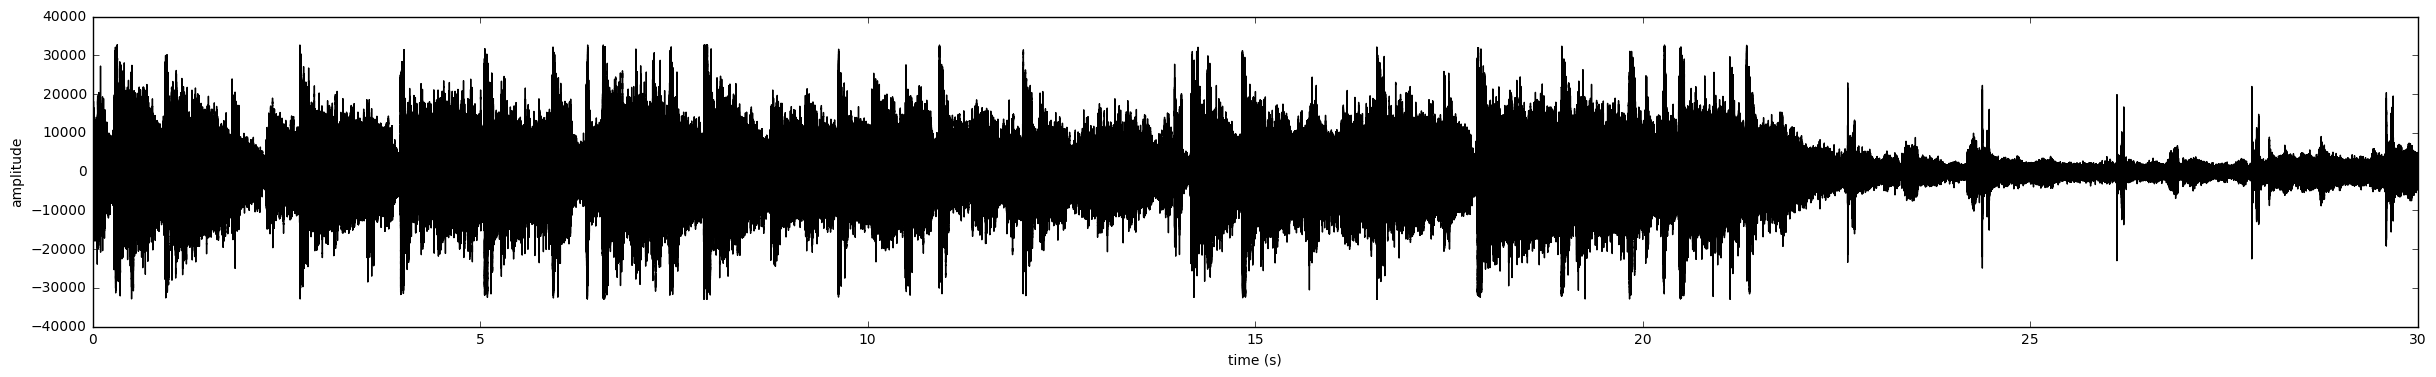

In [4]:
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('spotify_raw/artist3---rain.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
#plt.savefig('plot-artist3-rain.png', dpi=100)
plt.show()

To extract the features of the audio, following command line arguments are used:
Ref this for more details: https://github.com/tyiannak/pyAudioAnalysis/wiki/3.-Feature-Extraction

This command will create two files 'artist3---rain.wav.csv' for midterm features and 'artist3---rain.wav_st.csv' for short term features

### Extracting energy from raw-audio

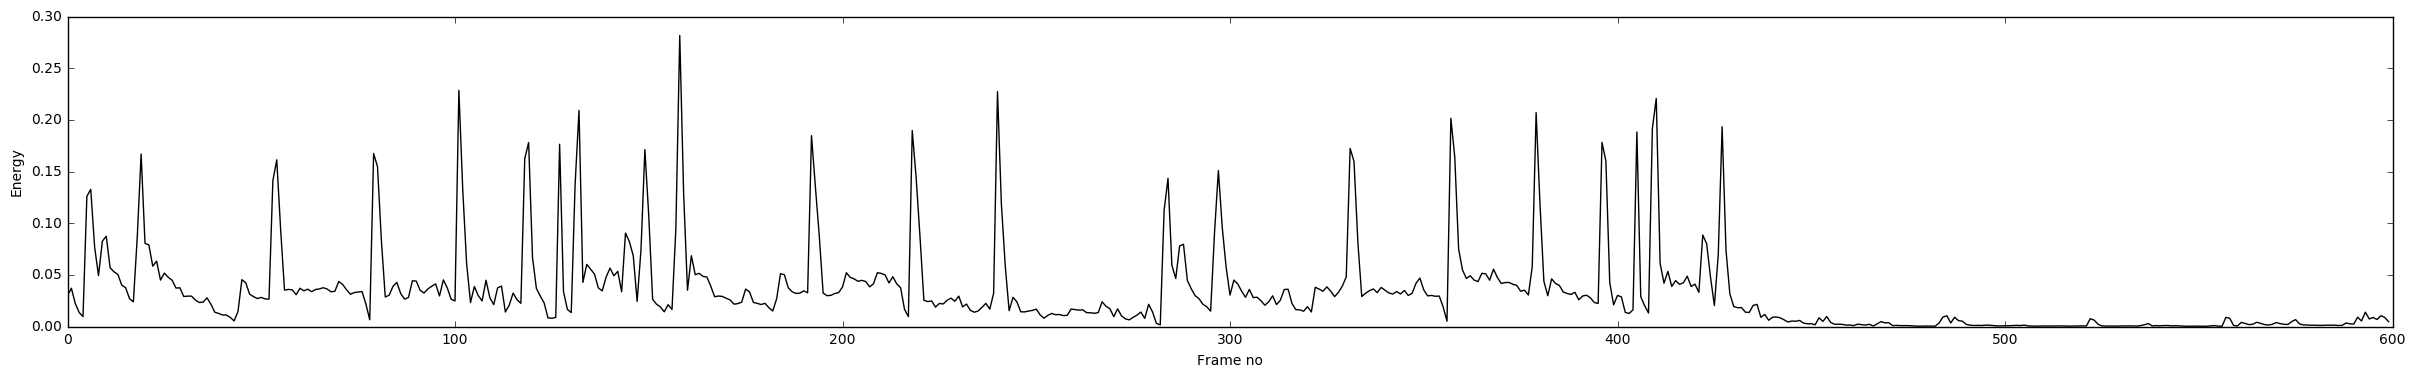

In [12]:
# reading the file and plotting the energy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
F= pd.read_csv('spotify_raw/artist3---rain.wav_st.csv', header = None)


F1 = np.array(F)

plt.figure(figsize=(30, 4))
plt.plot(F1[:,1], color = 'black'); plt.xlabel('Frame no'); plt.ylabel('Energy'); 

plt.show()


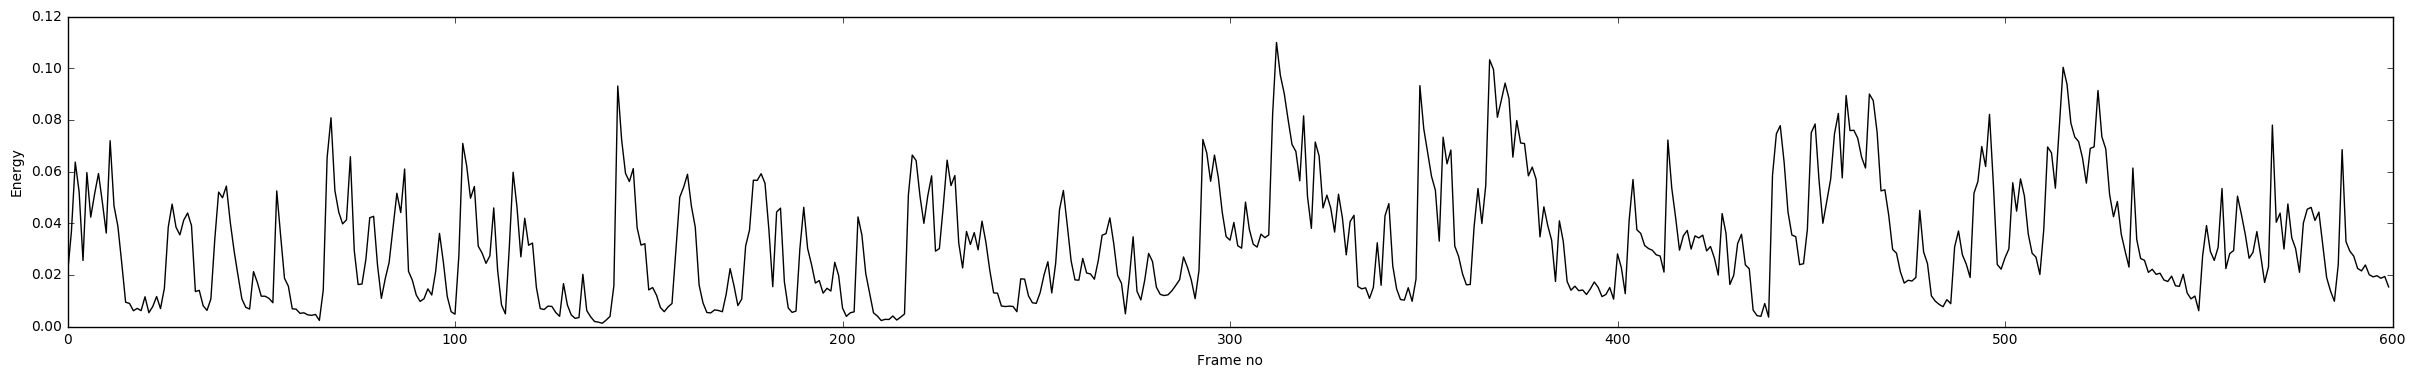

In [10]:
F= pd.read_csv('spotify_raw/artist1---breathe.wav_st.csv', header = None)

F2 = np.array(F)

#plt.subplot(2,1,1);  plt.plot(F2[:,4]);plt.xlabel('Frame no'); plt.ylabel('ZCR'); 
#plt.subplot(2,1,2); plt.plot(F2[:,1],color = 'black'); plt.xlabel('Frame no'); plt.ylabel('Energy'); plt.show()
plt.figure(figsize=(30, 4))
plt.plot(F2[:,1],color = 'black'); plt.xlabel('Frame no'); plt.ylabel('Energy'); 

plt.show()


python audioAnalysis.py featureExtractionFile -i spotify_raw/breathe.wav -mw 1.0 -ms 1.0 -sw 0.050 -ss 0.050 -o spotify_raw/breathe.wav